In [63]:
##Importing the necessary libraries needed for Linear Regression
## Data Modeling libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

##Plotting libraries
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [64]:
## Readung a car dataset to understand linear regression
data = pd.read_csv('C:/Users/Madhumita.Ganesan/Desktop/DataScience/data/auto_mpg_data.txt')

In [65]:
data.dtypes

cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
mpg             float64
dtype: object

In [66]:
data.head()

,cylinders,displacement,horsepower,weight,acceleration,mpg
0,8,307.0,130.0,3504.0,12.0,18.0
1,8,350.0,165.0,3693.0,11.5,15.0
2,8,318.0,150.0,3436.0,11.0,18.0
3,8,304.0,150.0,3433.0,12.0,16.0
4,8,302.0,140.0,3449.0,10.5,17.0


In [67]:
data.shape

(392, 6)

In [68]:
data.columns

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'mpg'],
      dtype='object')

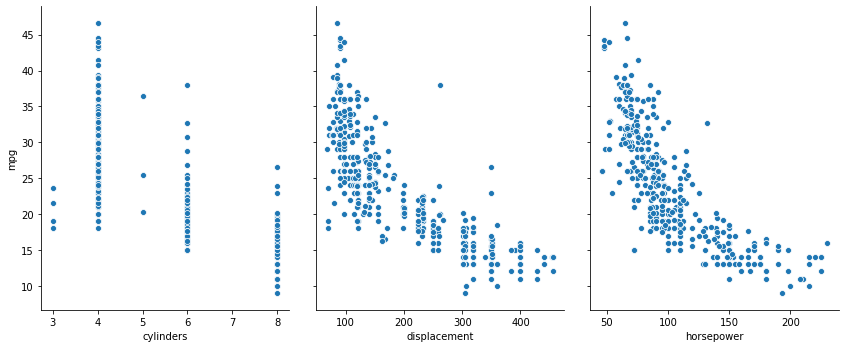

In [69]:
## VISUALIZING THE RELATIONSHIPS IN THE DATA

## Relationship b/w 3 attributes with mpg
sns.pairplot(data,x_vars=['cylinders', 'displacement', 'horsepower'],y_vars='mpg',height=5,aspect=0.8)

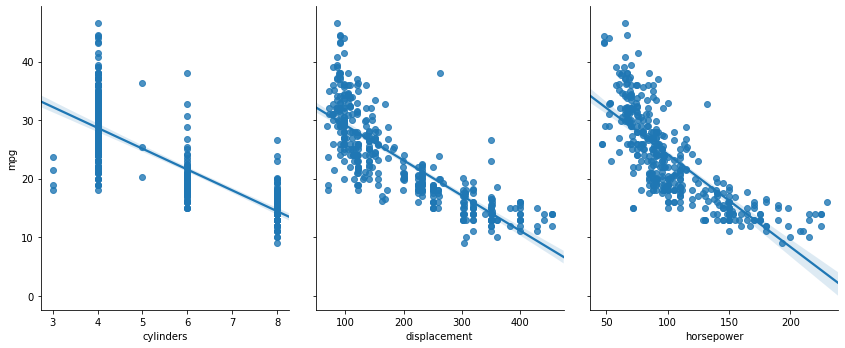

In [70]:
## To see Linear regression of these variables with mpg
sns.pairplot(data,x_vars=['cylinders', 'displacement', 'horsepower'],y_vars=['mpg'],height=5,aspect=0.8,kind='reg')

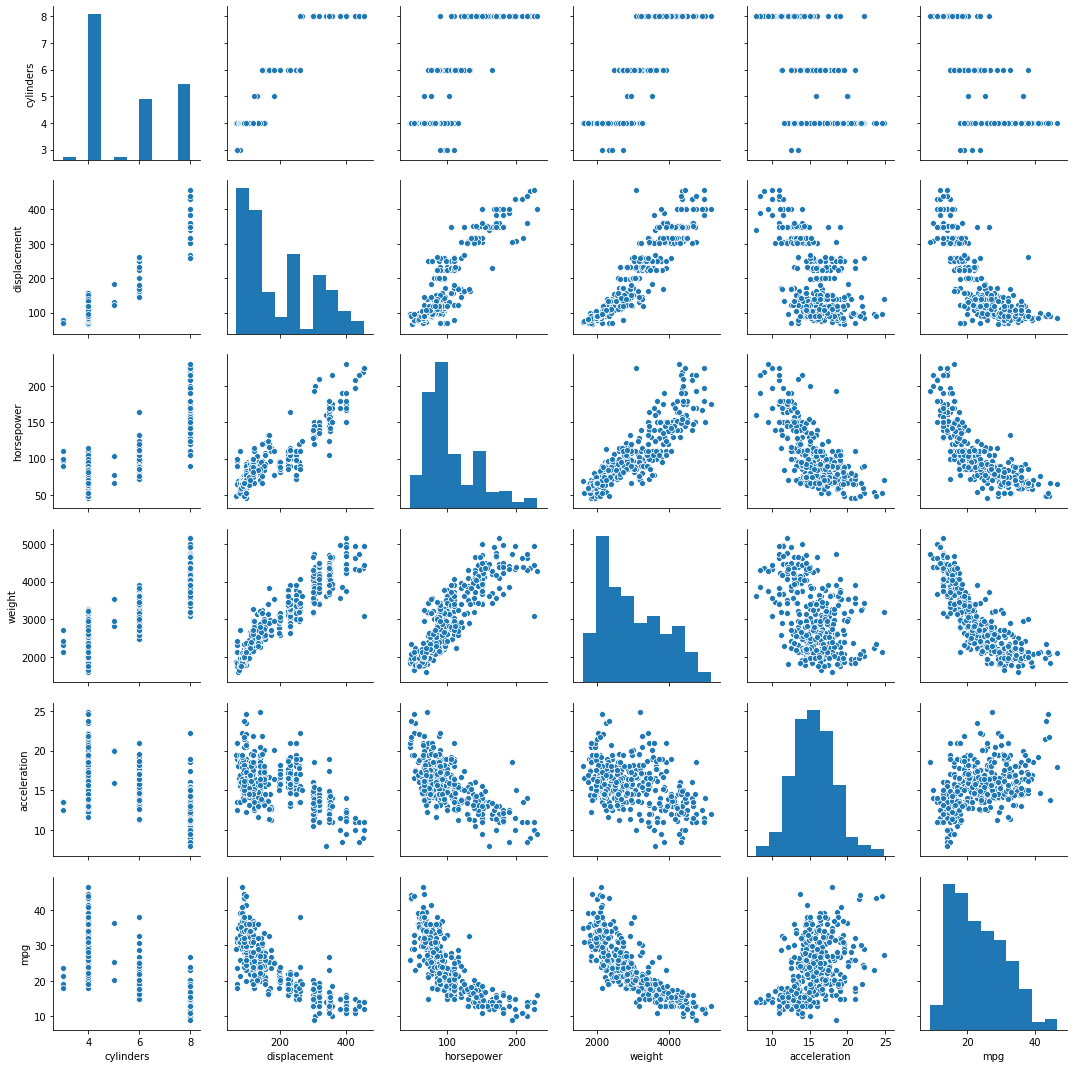

In [12]:
## Scatter plot showing relationships of all the variables in the data with one another
sns.pairplot(data)

In [71]:
## Correlation matrix of all elements relationship
auto_correlation=data.corr()
auto_correlation

,cylinders,displacement,horsepower,weight,acceleration,mpg
cylinders,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.777618
displacement,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.805127
horsepower,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.778427
weight,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.832244
acceleration,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.423329
mpg,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,1.000000


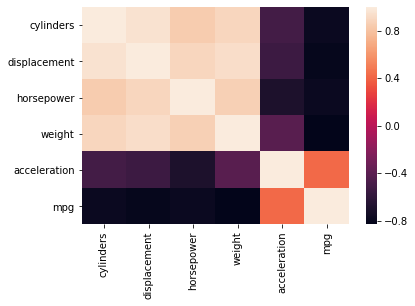

In [72]:
## Heatmap to see the correlations
sns.heatmap(auto_correlation)

In [73]:
### Simple Linear Regression (with 2 variables - Independent Variable (feature), and dependent variable(response))

#1) Define the feature and reponse
feature='acceleration'
X=data[feature]  ## feature
y=data.mpg       ## response

#2) Instantiate the linear regression class and fit the data
acc_linreg=LinearRegression()
acc_linreg.fit(X.values.reshape(-1,1),y.values.reshape(-1,1))    ## Training the model

#3) Print the coefficients and view the correlation
## y=mx+b
print("y intercept is : ",acc_linreg.intercept_)   ##b
print("single coefficient of x : ",acc_linreg.coef_) ##m

y intercept is :  [4.8332498]
single coefficient of x :  [[1.19762419]]


(0, 48.49087673038892)

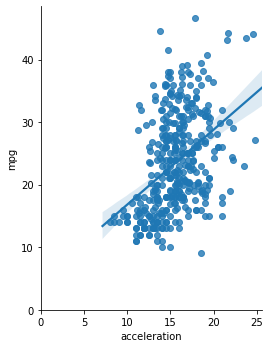

In [74]:
## Visualizing the same in a pairplot
sns.pairplot(data,x_vars=['acceleration'],y_vars='mpg',height=5,aspect=0.8,kind='reg')
sns.mpl.pyplot.xlim(0,)
sns.mpl.pyplot.ylim(0,)

## When Coefficient of x = 0, y ~= 4.8 (which is equal to intercept from the linear regression)

In [130]:
## Using this model for prediction
y_man= 4.833 + 1.197*28
print("Manually calculating response based on the values obtained from line reg : ", y_man)

## Calculatinf using methods in python
print("Reponse from the method : ",acc_linreg.predict([[28]]))
y_pred = acc_linreg.predict(X.values.reshape(-1,1))

Manually calculating response based on the values obtained from line reg :  38.349000000000004
Reponse from the method :  [[38.36672706]]


In [76]:
## Scale does not matter for the linear regression model
data["acc_centi"] = data.acceleration*100

X_centi = data.acc_centi
y_centi=data.mpg

acc_centi_linreg = LinearRegression()
acc_centi_lin=acc_centi_linreg.fit(X_centi.values.reshape(-1,1),y_centi.values.reshape(-1,1))

print("Intercept : ",acc_centi_lin.intercept_)
print("Slope : ",acc_centi_lin.coef_)

##Predicted value for acceleration in centimeters
print("Response with acc in centimeters is : ",acc_centi_lin.predict([[2800]]))

Intercept :  [4.8332498]
Slope :  [[0.01197624]]
Response with acc in centimeters is :  [[38.36672706]]


R^2: 0.17920705015625463


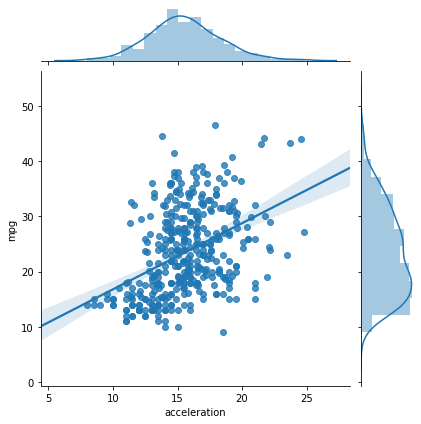

In [78]:
## How well does the model fit the data
## R-squared
sns.jointplot('acceleration','mpg',data,kind='reg')

print("R^2:", stats.pearsonr(X.values.flatten(),y.values)[0]**2)
#print("R^2:", stats.pearsonr(X.values.flatten(),y.values)[0]**2)
#type(X)

In [117]:
### Multiple Linear Regression with more independent variables

Feature=['acceleration','displacement','horsepower']
X_mul=data[Feature]
y_mul=data.mpg

mul_lin=LinearRegression()
mul_lin_response=mul_lin.fit(X_mul,y_mul)

print("Intercept is : ",mul_lin_response.intercept_)
print("Slope is : ",mul_lin_response.coef_)

##Interpreting the coefficients wrt to the Independent variables/attributes
list(zip(Feature,mul_lin_response.coef_))

##Predicted value
y_mul_predict=mul_lin_response.predict(X_mul)
#print(y_mul_predict)

## Comparing actual vs predicted value
df_compare=pd.DataFrame({"Actual":y_mul,'Predicted':y_mul_predict})
#df_compare

#X_mul.values.flatten()
##R-squared value
#print("R^2:",stats.pearsonr(X_mul.values.flatten(),y_mul[0]**2))
y_mul_r2=metrics.r2_score(y_mul,y_mul_predict)
print("r2 is : ",y_mul_r2)

Intercept is :  46.25470749685904
Slope is :  [-0.41222985 -0.03665995 -0.08878252]
r2 is :  0.6748704313006708


In [118]:
## Multiple linear regression with all attributes in the data set
data.columns

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'mpg', 'acc_centi'],
      dtype='object')

In [128]:
feature_cols = ['cylinders','displacement','horsepower','weight','acceleration']
X_1=data[feature_cols]
y_1=data.mpg

mul_lin_all = LinearRegression()
mul_lin_all1 = mul_lin_all.fit(X_1,y_1)

print("Intercept is : ",mul_lin_all1.intercept_)
print("Slope is : ",mul_lin_all1.coef_)
mul_all_predict=mul_lin_all1.predict(X_1)

df_1 = pd.DataFrame({'Actual':y_1,'Predicted':mul_all_predict})
print("Comaprison of actual Vs predicted model is : \n")
df_1

## R2 value for this model is 
y_mul_r2=metrics.r2_score(y_1,mul_all_predict)
print("R2 for this model is : ",y_mul_r2)

Intercept is :  46.26430785257115
Slope is :  [-3.97928359e-01 -8.31301222e-05 -4.52570802e-02 -5.18691735e-03
 -2.91047140e-02]
Comaprison of actual Vs predicted model is : 

R2 for this model is :  0.7076926326770515


In [137]:
##Other evaluation metrics for the model
## MAE (Mean Absolute error)  : Mean of absolute value of residuals
## MSE (Mean squared error)   : Squared value of MAE
## RMSE (Root mean squared error) : Square root of MSE

## For Model 1 with 1 variable

print("MAE for Linear Regression with 1 Independent Variable :",metrics.mean_absolute_error(y, y_pred))
print("MSE for Linear Regression with 1 Independent Variable :",metrics.mean_squared_error(y, y_pred))
print("RMSE for Linear Regression with 1 Independent Variable :",np.sqrt(metrics.mean_squared_error(y, y_pred)))
print("\n")

## For Model 2 with 3 variable

print("MAE for Linear Regression with 3 Independent Variable :",metrics.mean_absolute_error(y_mul, y_mul_predict))
print("MSE for Linear Regression with 3 Independent Variable :",metrics.mean_squared_error(y_mul, y_mul_predict))
print("RMSE for Linear Regression with 3 Independent Variable :",np.sqrt(metrics.mean_squared_error(y_mul, y_mul_predict)))
print("\n")

## For Model 2 with ALL variable

print("MAE for Linear Regression with ALL Independent Variable :",metrics.mean_absolute_error(y_1, mul_all_predict))
print("MSE for Linear Regression with ALL Independent Variable :",metrics.mean_squared_error(y_1, mul_all_predict))
print("RMSE for Linear Regression with ALL Independent Variable :",np.sqrt(metrics.mean_squared_error(y_1, mul_all_predict)))

MAE for Linear Regression with 1 Independent Variable : 5.795118114287833
MSE for Linear Regression with 1 Independent Variable : 49.87362732665226
RMSE for Linear Regression with 1 Independent Variable : 7.062126261024527


MAE for Linear Regression with 3 Independent Variable : 3.3991622942599844
MSE for Linear Regression with 3 Independent Variable : 19.755762942740258
RMSE for Linear Regression with 3 Independent Variable : 4.444745543081208


MAE for Linear Regression with ALL Independent Variable : 3.2223001384505627
MSE for Linear Regression with ALL Independent Variable : 17.76139610540622
RMSE for Linear Regression with ALL Independent Variable : 4.214427138462145


In [140]:
### Using Test/Train data to bring a better model
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

print("Training data size : ",X_train.shape)
print("Testing data size : ",X_test.shape)
print("Actual data size : ",X.shape)

Training data size :  (274,)
Testing data size :  (118,)
Actual data size :  (392,)


In [146]:
#Train on Training set
mullinreg2 = LinearRegression()
mullinreg2.fit(X_train.values.reshape(-1,1),y_train)

# Generate predictions on training set and evaluate RMSE
y_mult_pred_train =mullinreg2.predict(X_train.values.reshape(-1,1))
print("RMSE for training data set is : ",np.sqrt(metrics.mean_squared_error(y_train,y_mult_pred_train)))

# Generate predictions on test set and evaluate RMSE
y_mult_pred_test=mullinreg2.predict(X_test.values.reshape(-1,1))
print("RMSE for testing data set is : ",np.sqrt(metrics.mean_squared_error(y_test,y_mult_pred_test)))

RMSE for training data set is :  6.821766384512658
RMSE for training data set is :  7.605157583396131


In [149]:
## Generating full linear regression model on test and train samples
## 30% test data

Xf_train,Xf_test,yf_train,yf_test=train_test_split(X_1,y_1,test_size=0.3,random_state=1)

fullinreg1=LinearRegression()
fullinreg1.fit(Xf_train,yf_train)

y_all_pred_train=fullinreg1.predict(Xf_train)
y_all_pred_test=fullinreg1.predict(Xf_test)

print("RMSE for 30% train is : ",np.sqrt(metrics.mean_squared_error(yf_train,y_all_pred_train)))
print("RMSE for 30% test is : ",np.sqrt(metrics.mean_squared_error(yf_test,y_all_pred_test)))

RMSE for 30% train is :  4.212115162806344
RMSE for 30% test is :  4.300031238278894


In [150]:
## Generating full linear regression model on test and train samples
## 20% test data

Xf_train,Xf_test,yf_train,yf_test=train_test_split(X_1,y_1,test_size=0.2,random_state=1)

fullinreg1=LinearRegression()
fullinreg1.fit(Xf_train,yf_train)

y_all_pred_train=fullinreg1.predict(Xf_train)
y_all_pred_test=fullinreg1.predict(Xf_test)

print("RMSE for 20% train is : ",np.sqrt(metrics.mean_squared_error(yf_train,y_all_pred_train)))
print("RMSE for 20% test is : ",np.sqrt(metrics.mean_squared_error(yf_test,y_all_pred_test)))

RMSE for 20% train is :  4.179291068259566
RMSE for 20% test is :  4.427627656314788


In [151]:
## Generating full linear regression model on test and train samples
## 10% test data

Xf_train,Xf_test,yf_train,yf_test=train_test_split(X_1,y_1,test_size=0.1,random_state=1)

fullinreg1=LinearRegression()
fullinreg1.fit(Xf_train,yf_train)

y_all_pred_train=fullinreg1.predict(Xf_train)
y_all_pred_test=fullinreg1.predict(Xf_test)

print("RMSE for 10% train is : ",np.sqrt(metrics.mean_squared_error(yf_train,y_all_pred_train)))
print("RMSE for 10% test is : ",np.sqrt(metrics.mean_squared_error(yf_test,y_all_pred_test)))

RMSE for 10% train is :  4.208695436371084
RMSE for 10% test is :  4.294566605333294


In [153]:
pd.DataFrame([['a','b','c'],
               ['d','e','f'],
               ['i','j','k']],columns=["col1","col2","col3"],index=["ind1","ind2","ind3"])

,col1,col2,col3
ind1,a,b,c
ind2,d,e,f
ind3,i,j,k
